# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [24]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Let us look at the description of major attributes in the dataset 

• URL: anonymized URL which may or may not be malicious. 

• URL_LENGTH: Indicates number of characters in the URL.

• NUMBER_SPECIAL_CHARACTERS: Indicates special characers in the URL.

• CHARSET: It indicates the character encoding standard and is a categorical variable.

• SERVER: It indicates the operative system of the server got from the packet response and is a categorical 
variable.

• CONTENT_LENGTH: It indicates the content size of HTTP header.

• WHOIS_COUNTRY: Using Whois API it indicates the Countries the server got a response and is a categorical variable.

• WHOIS_STATEPRO: Using Whois API it indicates the States the server got a response and is a categorical variable.

• WHOIS_REGDATE: It indicates the Whois server registration date.

• WHOIS_UPDATED_DATE: It indicates the last update date from the server analyzed.

• TCP_CONVERSATION_EXCHANGE: It indicates the number of TCP packets that were exchanged between the honeypot client and the server.

• DIST_REMOTE_TCP_PORT: It indicates the number of ports detected.

• REMOTE_IPS: It indicates the total number of IPs connected to honeypot client.

• APP_BYTES: It indicates the number of bytes transfered.

• SOURCE_APP_PACKETS: It indicates the packets sent from the honeypot to the server.

• REMOTE_APP_PACKETS: It indicates the packets received from the server.

• APP_PACKETS: It is the total number of IP packets generated during the communication between the honeypot and the server.

• DNS_QUERY_TIMES: It indicates the number of DNS packets generated during the communication between the honeypot and the server.

• TYPE: This is the outcome variable indicating whether the website is malicious or not.

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [276]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [277]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [278]:
websites.shape

(1781, 21)

In [279]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [280]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [281]:
websites.Type.value_counts()

0    1565
1     216
Name: Type, dtype: int64

In [282]:
websites.WHOIS_COUNTRY.value_counts().head()

US      1103
None     306
CA        84
ES        63
AU        35
Name: WHOIS_COUNTRY, dtype: int64

In [283]:
websites.WHOIS_STATEPRO.value_counts().head()

CA           372
None         362
NY            75
WA            65
Barcelona     62
Name: WHOIS_STATEPRO, dtype: int64

In [284]:
websites.WHOIS_REGDATE.value_counts().head()

None               127
17/09/2008 0:00     62
13/01/2001 0:12     59
31/07/2000 0:00     47
15/02/2005 0:00     41
Name: WHOIS_REGDATE, dtype: int64

In [285]:
# Your comment here

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [286]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [287]:
website_numerics = websites[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS','CONTENT_LENGTH',
                             'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']]


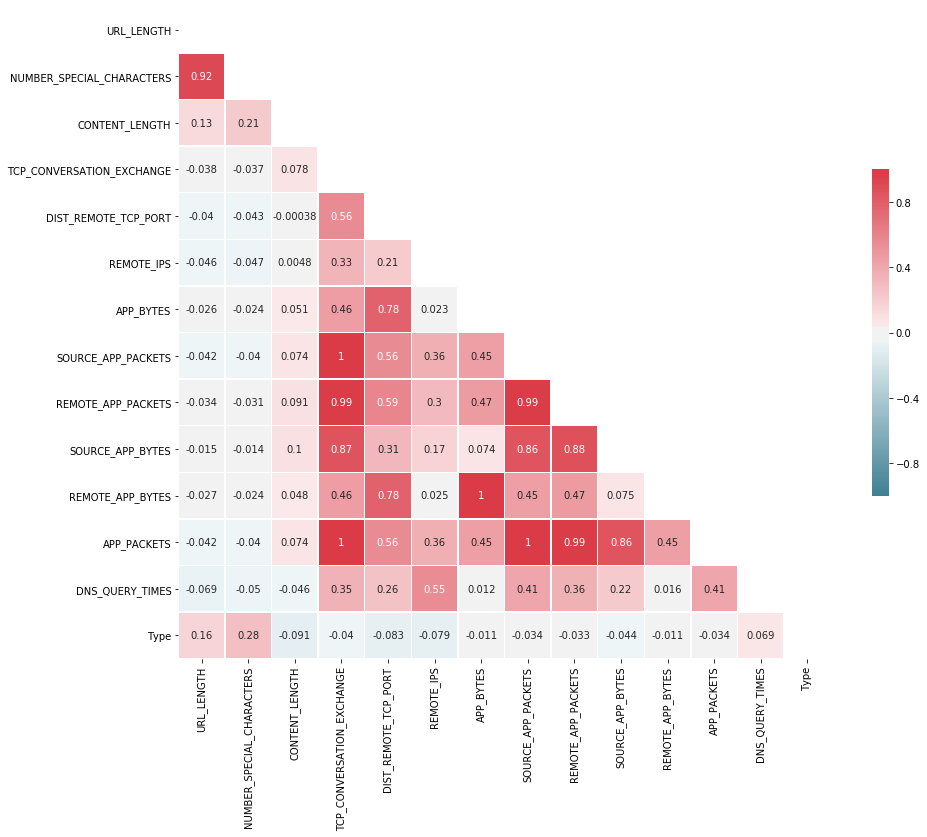

In [288]:
corr=website_numerics.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [289]:
# Your comment here



# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [290]:
website_numerics2 = website_numerics.drop(['REMOTE_APP_PACKETS','TCP_CONVERSATION_EXCHANGE',\
                                             'SOURCE_APP_PACKETS'], axis=1)

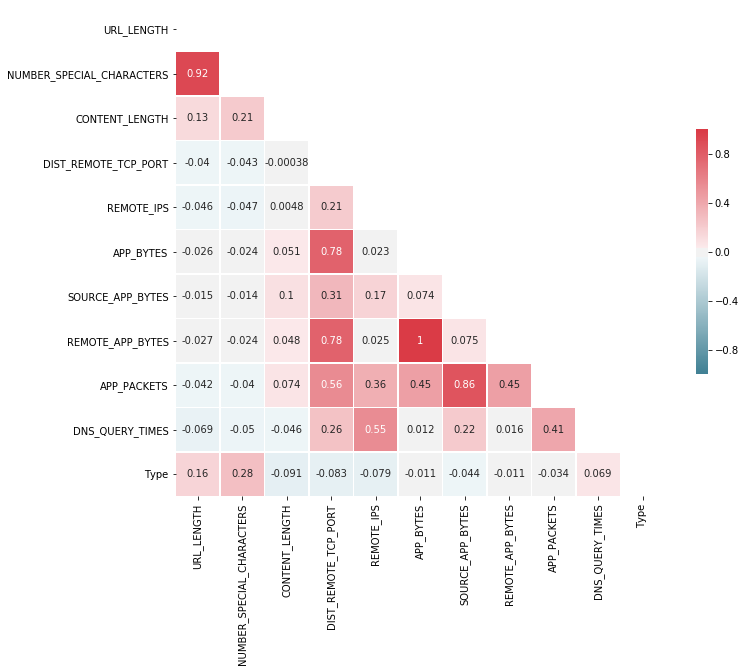

In [291]:
corr2=website_numerics2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap,annot=True, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [292]:
website_numerics3 = website_numerics2.drop(['REMOTE_APP_BYTES','URL_LENGTH'], axis=1)

# Your comment here


> 1- First, a selection of only the numerical values was needed to calculate the correaltion among the numerical variables

> 2- Second, I print the correaltion heatmap to see if there was any colinearity amongh the numerical variables

> 3- Third, I deleted the RV with corr coeff more than .90 as they are extremely correlated and it cause problems in the ML model. 

> Note: My criteria of elimination when two rv where correlated more than .90, was to delete columns that seem less important. For example, between REMOTE APP BYTES and APP BYTES, I choose to delete the former one as I rather have the total amount of bytes rather than the remote ones. Same with NUMBER OF SPECIAL CHAR and URL LENGHT as the former had more corrleation with the target variable I decide to keep it. Again, this is very arbitraty since y knowledge with websites is very limited.

> 4- As a final step, I slice the original dataset "websites" to get only the numerical variables resulting from the colinearity analysis and the original categorical variables.








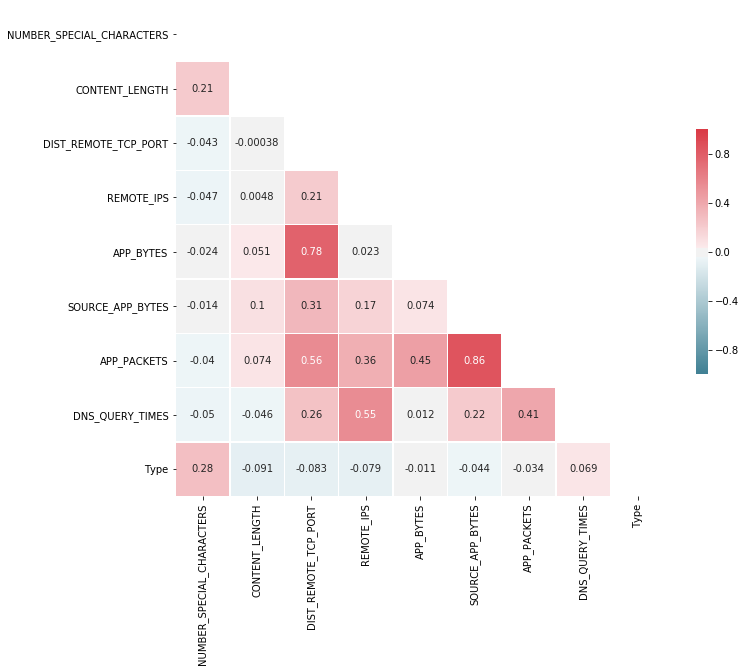

In [293]:
# Print heatmap again
corr3=website_numerics3.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr3, mask=mask, cmap=cmap,annot=True, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [294]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [295]:
web = websites[['URL', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE','DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']]

In [296]:
web.head(3)

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,0,2,700,1153,9,2.0,1
1,B0_2314,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,7,4,1230,1265,17,0.0,0
2,B0_911,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0.0,0


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [297]:
# Your code here
web.isna().sum()

URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [298]:
# Your code here

web.CONTENT_LENGTH.isna().sum() / web.CONTENT_LENGTH.count() * 100

83.79772961816305

In [299]:
#In this case make sense to drop this columns since 83% of the data is missing

web = web.drop(['CONTENT_LENGTH'],axis =1)

In [300]:
web = web.dropna()

#### Your comment here

> As checking if the dataset contain missing data, the column CONTENT_LENGHT seem problematic. For this reason, I calculate the proportion of NaN values in this columns agains the total number of rows, resulting with 83% of missing values. Based on this insight, I decided to drop this column.

> Moreover, as the resulting missing values were 1 for SERVER and 1 for DNS_QUERY_TIMES, I apply a dropna() function to elimiate those rows.


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [301]:
# Examine missing values in each column
web.isna().sum()

URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [302]:
web.WHOIS_COUNTRY = web.WHOIS_COUNTRY.apply(lambda x: x.replace('Cyprus','CY') if x =='Cyprus' else x)
web.WHOIS_COUNTRY = web.WHOIS_COUNTRY.apply(lambda x: x.replace('us','US') if x =='us' else x)
web.WHOIS_COUNTRY = web.WHOIS_COUNTRY.apply(lambda x: x.replace('se','SE') if x =='se' else x)
web.WHOIS_COUNTRY = web.WHOIS_COUNTRY.apply(lambda x: x.replace('UK','GB') if x =='UK' else x)

web.loc[web["WHOIS_COUNTRY"].str.startswith("[u'GB"), "WHOIS_COUNTRY"] = "GB"
web.loc[web["WHOIS_COUNTRY"].str.match("United Kingdom"), "WHOIS_COUNTRY"] = "GB"

In [303]:
web.WHOIS_COUNTRY.value_counts().head()

US      1105
None     306
CA        83
ES        63
AU        35
Name: WHOIS_COUNTRY, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

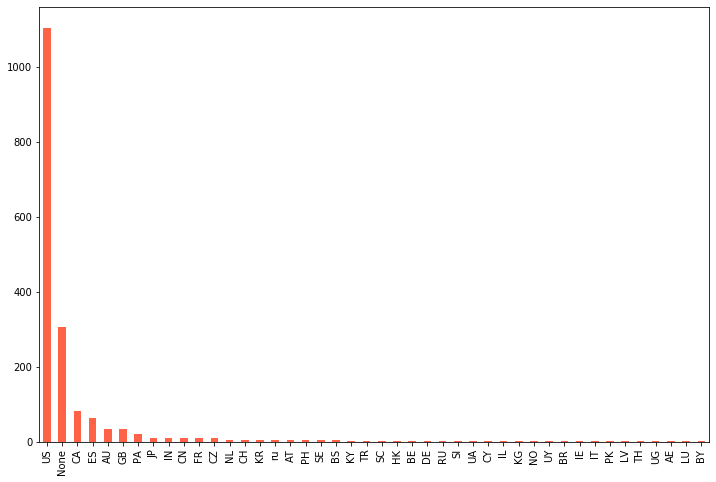

In [304]:
# Your code here

web.WHOIS_COUNTRY.value_counts().plot(kind='bar', figsize=(12,8), color="tomato")

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [305]:
# Your code here
lista_top = ['US','CA', 'ES', 'AU', 'GB','PA','JP','IN','CN','FR']
web.WHOIS_COUNTRY = web.WHOIS_COUNTRY.apply(lambda x: np.where(x in (lista_top), x,'OTHERS'))

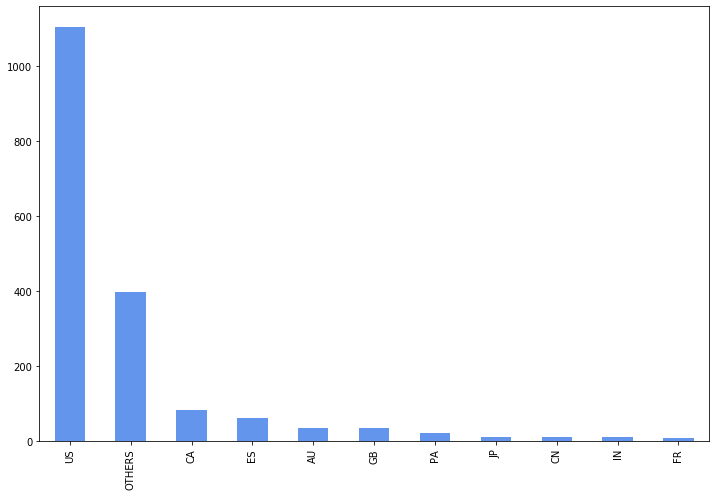

In [306]:
web.WHOIS_COUNTRY.value_counts().plot(kind='bar', figsize=(12,8), color="cornflowerblue")

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [307]:
# Your code here
web = web.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [308]:
web.dtypes

URL                           object
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [309]:
# Your code here
web.URL.unique()

array(['M0_109', 'B0_2314', 'B0_911', ..., 'B0_162', 'B0_1152', 'B0_676'],
      dtype=object)

In [310]:
web = web.drop(['URL'], axis=1)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [311]:
# Your code here
web.CHARSET.value_counts()

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1252      1
ISO-8859          1
windows-1251      1
Name: CHARSET, dtype: int64

In [312]:
web.loc[web["CHARSET"].str.startswith("ISO"), "CHARSET"] = "ISO"
web.loc[web["CHARSET"].str.startswith("iso"), "CHARSET"] = "ISO"
web.loc[web["CHARSET"].str.startswith("wind"), "CHARSET"] = "WINDOWS"
web.loc[web["CHARSET"].str.startswith("utf"), "CHARSET"] = "UTF-8"
web.loc[web["CHARSET"].str.startswith("us"), "CHARSET"] = "US-ASCII"


In [313]:
web.CHARSET.value_counts()

UTF-8       1053
ISO          562
US-ASCII     155
None           7
WINDOWS        2
Name: CHARSET, dtype: int64

In [314]:
web = web[web['CHARSET'] != 'None']

In [315]:
web.CHARSET.value_counts()

UTF-8       1053
ISO          562
US-ASCII     155
WINDOWS        2
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [316]:
# Your code here
web.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [317]:
web.loc[web["SERVER"].str.match("Microsoft"), "SERVER"] = "Microsoft"
web.loc[web["SERVER"].str.match("Apache"), "SERVER"] = "Apache"
web.loc[web["SERVER"].str.match("nginx"), "SERVER"] = "nginx"
web.loc[web["SERVER"].str.startswith("Nginx"), "SERVER"] = "nginx"


In [318]:
lista_server = ['Apache', 'nginx', 'Microsoft']
web.SERVER = web.SERVER.apply(lambda x: np.where(x in (lista_server), x,'Others'))

In [319]:
# Count `SERVER` value counts here
web.SERVER.value_counts()

Apache       639
Others       595
nginx        342
Microsoft    196
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [321]:
# Your code here
website_dummy = pd.get_dummies(web, columns = ['SERVER','CHARSET','WHOIS_COUNTRY'], drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [323]:
# Your code here
website_dummy.columns

Index(['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES',
       'Type', 'SERVER_Microsoft', 'SERVER_Others', 'SERVER_nginx',
       'CHARSET_US-ASCII', 'CHARSET_UTF-8', 'CHARSET_WINDOWS',
       'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES',
       'WHOIS_COUNTRY_FR', 'WHOIS_COUNTRY_GB', 'WHOIS_COUNTRY_IN',
       'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_OTHERS', 'WHOIS_COUNTRY_PA',
       'WHOIS_COUNTRY_US'],
      dtype='object')

In [ ]:
#drops: SERVER = Apache, CHARSET = ISO, WHOISCOUNTRY = AUSTRALIA

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [325]:
y = website_dummy['Type']
X=website_dummy[['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES',
        'SERVER_Microsoft', 'SERVER_Others', 'SERVER_nginx',
       'CHARSET_US-ASCII', 'CHARSET_UTF-8', 'CHARSET_WINDOWS',
       'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES',
       'WHOIS_COUNTRY_FR', 'WHOIS_COUNTRY_GB', 'WHOIS_COUNTRY_IN',
       'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_OTHERS', 'WHOIS_COUNTRY_PA',
       'WHOIS_COUNTRY_US']]

In [328]:
from sklearn.model_selection import train_test_split

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [329]:
# Your code here:
from sklearn.linear_model import LogisticRegression

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [330]:
# Your code here:
web_log_model = LogisticRegression().fit(X_train, y_train)


/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [333]:
# Your code here:
from sklearn.metrics import confusion_matrix

y_pred_test = web_log_model.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred_test))



,0,1
0,306,8
1,22,19


What are your thoughts on the performance of the model? Write your conclusions below.

In [33]:
# Your conclusions here:



#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [344]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

KNN_3 = KNeighborsClassifier(n_neighbors=3)
KNN_3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [345]:
KNN_3.score(X_test, y_test)

0.9380281690140845

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [341]:
# Your code here:

y_pred_test = KNN_3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred_test))

,0,1
0,305,9
1,13,28


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [342]:
# Your code here:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

KNN_5 = KNeighborsClassifier(n_neighbors=5)
KNN_5.fit(X_train, y_train)

## See how the model performs on the test data.
KNN_5.score(X_test, y_test)


0.9267605633802817

In [343]:
y_pred_test = KNN_5.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred_test))

,0,1
0,304,10
1,16,25


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [37]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [38]:
# Your code here